In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import sklearn

In [9]:
new_data = pd.read_csv('/content/metal.csv')
new_data = new_data.drop(columns=new_data.columns[0])

In [10]:
new_data.describe()

,VOL,AREA_F,APT_NUM,ST_NUM,KREIS,ZIPCODE,YOC,METAL
count,277.000000,277.000000,277.000000,277.000000,277.00000,277.000000,277.000000,277.000000
mean,1502.382671,147.148014,4.740072,4.577617,7.65704,8044.108303,1942.187726,33.594874
std,722.392501,47.132904,2.822840,0.973529,3.14874,15.230446,12.181038,41.572061
min,226.000000,52.000000,1.000000,1.000000,2.00000,8002.000000,1904.000000,0.050000
25%,915.000000,115.000000,2.000000,4.000000,6.00000,8045.000000,1933.000000,5.050000
50%,1529.000000,161.000000,6.000000,5.000000,9.00000,8048.000000,1948.000000,14.310000
75%,1873.000000,175.000000,6.000000,5.000000,11.00000,8052.000000,1950.000000,45.000000
max,3445.000000,258.000000,13.000000,7.000000,12.00000,8057.000000,1972.000000,157.340000


One-hot encode of categorical data


In [11]:
new_data['KREIS'] = new_data['KREIS'].astype('category')
new_data['ZIPCODE'] = new_data['ZIPCODE'].astype('category')
# One-hot encode the data using pandas get_dummies
new_data = pd.get_dummies(new_data)
print
print(new_data.columns)
print(new_data.shape)

Index(['VOL', 'AREA_F', 'APT_NUM', 'ST_NUM', 'YOC', 'METAL', 'KREIS_2',
       'KREIS_3', 'KREIS_4', 'KREIS_6', 'KREIS_7', 'KREIS_8', 'KREIS_9',
       'KREIS_10', 'KREIS_11', 'KREIS_12', 'ZIPCODE_8002', 'ZIPCODE_8004',
       'ZIPCODE_8006', 'ZIPCODE_8008', 'ZIPCODE_8032', 'ZIPCODE_8038',
       'ZIPCODE_8044', 'ZIPCODE_8045', 'ZIPCODE_8046', 'ZIPCODE_8047',
       'ZIPCODE_8048', 'ZIPCODE_8049', 'ZIPCODE_8050', 'ZIPCODE_8051',
       'ZIPCODE_8052', 'ZIPCODE_8053', 'ZIPCODE_8055', 'ZIPCODE_8057',
       'ROOF_F', 'ROOF_M', 'ROOF_O', 'ROOF_P', 'POC_1900 - 1919',
       'POC_1919 - 1945', 'POC_1946 - 1960', 'POC_1961 - 1970',
       'POC_1971 - 1980'],
      dtype='object')
(277, 43)


Examine the split's characteristic

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
material = 'METAL'
# labels Y
Y=new_data[material]

#features X
X= new_data.drop(columns=material)

#save X headers for later
headers = list(X.columns)
print(headers)

['VOL', 'AREA_F', 'APT_NUM', 'ST_NUM', 'YOC', 'KREIS_2', 'KREIS_3', 'KREIS_4', 'KREIS_6', 'KREIS_7', 'KREIS_8', 'KREIS_9', 'KREIS_10', 'KREIS_11', 'KREIS_12', 'ZIPCODE_8002', 'ZIPCODE_8004', 'ZIPCODE_8006', 'ZIPCODE_8008', 'ZIPCODE_8032', 'ZIPCODE_8038', 'ZIPCODE_8044', 'ZIPCODE_8045', 'ZIPCODE_8046', 'ZIPCODE_8047', 'ZIPCODE_8048', 'ZIPCODE_8049', 'ZIPCODE_8050', 'ZIPCODE_8051', 'ZIPCODE_8052', 'ZIPCODE_8053', 'ZIPCODE_8055', 'ZIPCODE_8057', 'ROOF_F', 'ROOF_M', 'ROOF_O', 'ROOF_P', 'POC_1900 - 1919', 'POC_1919 - 1945', 'POC_1946 - 1960', 'POC_1961 - 1970', 'POC_1971 - 1980']


In [ ]:
from scipy import stats
from scipy.stats import ks_2samp

# take second element for sort
def takeSecond(elem):
    return elem[1]

n_features = X.shape[1]
n_tries = 300
result = []

#split for 100 random seeds, measure Kolmogorov-Smirnov distance
for random_state in range(n_tries):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=random_state)

  distances = list(map(lambda i : ks_2samp(X_train.iloc[:,i],X_test.iloc[:,i]).statistic,range(n_features)))

  result.append((random_state,max(distances)))

result.sort(key=takeSecond)
result

[(260, 0.08642350557244174),
 (291, 0.09625126646403243),
 (85, 0.09635258358662614),
 (52, 0.09929078014184398),
 (110, 0.10010131712259372),
 (222, 0.10091185410334347),
 (191, 0.10233029381965553),
 (42, 0.10486322188449848),
 (257, 0.10486322188449848),
 (296, 0.10486322188449848),
 (63, 0.10699088145896657),
 (9, 0.10780141843971631),
 (49, 0.10921985815602837),
 (212, 0.11013171225937184),
 (244, 0.11114488348530902),
 (258, 0.1127659574468085),
 (19, 0.11702127659574468),
 (163, 0.11722391084093212),
 (205, 0.117629179331307),
 (54, 0.11773049645390071),
 (116, 0.11783181357649443),
 (216, 0.11843971631205674),
 (269, 0.11884498480243161),
 (1, 0.1193515704154002),
 (95, 0.12026342451874367),
 (141, 0.12026342451874367),
 (169, 0.12137791286727458),
 (65, 0.1226950354609929),
 (252, 0.1232016210739615),
 (196, 0.12441742654508611),
 (197, 0.12441742654508611),
 (243, 0.12441742654508611),
 (112, 0.12512664640324214),
 (20, 0.12522796352583587),
 (37, 0.12634245187436677),
 (51, 

In [ ]:
from google.colab import files

ks_metal = pd.DataFrame(data = result)
ks_metal.to_csv('ks_metal.csv', encoding = 'utf-8-sig') 
files.download('ks_metal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# labels as numpy array
Y=np.array(Y)

#features as numpy array
X = np.array(X)

X_TV, X_test, Y_TV, Y_test = train_test_split(X,Y,test_size = 0.15, random_state = 296) #this split, meaning, this random seed, has to be the same for all the models!


YOC  :  0.10486322188449848
AREA_F  :  0.09311043566362716
VOL  :  0.07750759878419453
ZIPCODE_8046  :  0.07649442755825735
APT_NUM  :  0.07264437689969605
ZIPCODE_8052  :  0.05714285714285714
ZIPCODE_8057  :  0.05623100303951368
KREIS_3  :  0.04842958459979736
ZIPCODE_8045  :  0.04336372847011145
ZIPCODE_8048  :  0.04012158054711246
ZIPCODE_8006  :  0.03910840932117528
ST_NUM  :  0.034954407294832825
POC_1961 - 1970  :  0.03404255319148936
ZIPCODE_8050  :  0.0315096251266464
ROOF_F  :  0.029787234042553193
ZIPCODE_8055  :  0.024620060790273558
POC_1946 - 1960  :  0.02421479229989868
ZIPCODE_8038  :  0.022188449848024316
ROOF_O  :  0.022087132725430596
ZIPCODE_8008  :  0.01955420466058764
KREIS_8  :  0.01955420466058764
ZIPCODE_8053  :  0.018743667679837893
KREIS_9  :  0.018034447821681863
ROOF_P  :  0.017933130699088147
ZIPCODE_8002  :  0.01529888551165147
KREIS_7  :  0.013677811550151976
ZIPCODE_8049  :  0.013576494427558258
KREIS_10  :  0.013576494427558258
KREIS_6  :  0.01286727456

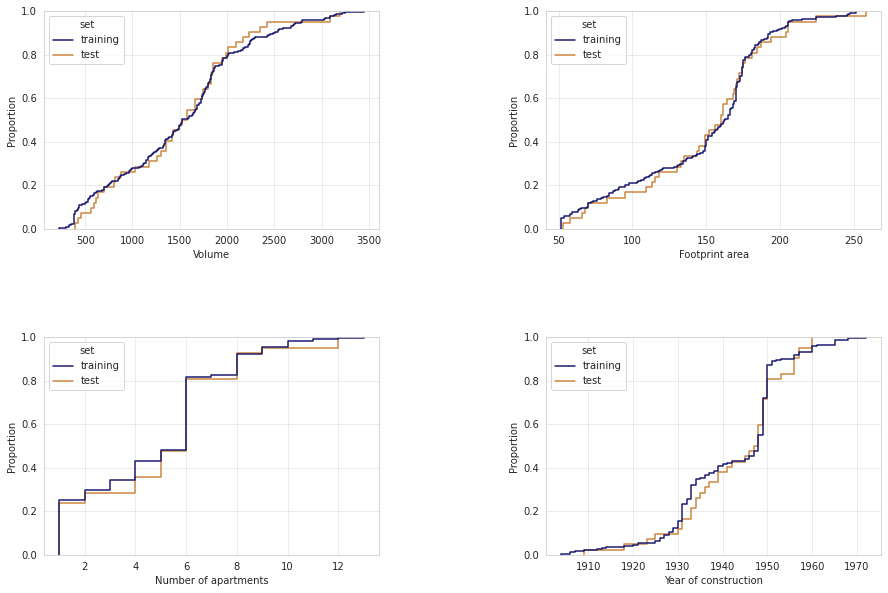

In [13]:
# CONVERT BACK TO DF FOR SCRIPT COMPATIBILITY
X_TV = pd.DataFrame(X_TV)
X_test = pd.DataFrame(X_test)
overview = {}

#STYLE

spacing = 0.5
f = plt.figure(figsize=(15,10))
gs = f.add_gridspec(2, 2)
gs.update(wspace = spacing, hspace = spacing)

# GRID

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 0])
    feature_name = 'Volume'
    df = pd.DataFrame({
    feature_name:np.concatenate((X_TV.loc[:,0],X_test.loc[:,0])),
    'set':['training']*X_TV.shape[0] + ['test']*X_test.shape[0]
    })
    sns.ecdfplot(data=df,x=feature_name,hue='set', palette = ["midnightblue",'peru'])

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 1])
    feature_name = 'Footprint area'
    df = pd.DataFrame({
    feature_name:np.concatenate((X_TV.loc[:,1],X_test.loc[:,1])),
    'set':['training']*X_TV.shape[0] + ['test']*X_test.shape[0]
    })
    sns.ecdfplot(data=df,x=feature_name,hue='set', palette = ["midnightblue",'peru'])

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[1, 0])
    feature_name = 'Number of apartments'
    df = pd.DataFrame({
    feature_name:np.concatenate((X_TV.loc[:,2],X_test.loc[:,2])),
    'set':['training']*X_TV.shape[0] + ['test']*X_test.shape[0]
    })
    sns.ecdfplot(data=df,x=feature_name,hue='set', palette = ["midnightblue",'peru'])

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[1, 1])
    feature_name = 'Year of construction'
    df = pd.DataFrame({
    feature_name:np.concatenate((X_TV.loc[:,4],X_test.loc[:,4])),
    'set':['training']*X_TV.shape[0] + ['test']*X_test.shape[0]
    })
    sns.ecdfplot(data=df,x=feature_name,hue='set', palette = ["midnightblue",'peru'])
    
# SORTED DICTIONARY OF FEATURE : DISTANCE

distances = list(map(lambda i : ks_2samp(X_TV.iloc[:,i],X_test.iloc[:,i]).statistic,range(X_TV.shape[1])))

for i in range(X_TV.shape[1]):
  overview[headers[i]]= distances[i]

overview_sorted = sorted(overview.items(),key=lambda kv:
                 (kv[1], kv[0]), reverse=True)

for key, value in overview_sorted:
  print(key, ' : ', value)

print("\n", "Maximal Kolmogorov-Smirnov distance is: ", max(distances), "\n")

Split data into TEST (T) that I don't touch and train + validation set (TV)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# labels as numpy array
Y=np.array(new_data['WOOD'])

#features as numpy array
X_list= new_data.drop(columns='WOOD')
X = np.array(X_list)

#save headers for later
headers = list(new_data.columns)

X_TV, X_T, Y_TV, Y_T = train_test_split(X,Y,test_size = 0.1, random_state = 54) #this split, meaning, this random seed, has to be the same for all the models!

print(X_T, Y_T)

[[1827  170    6 ...    1    0    0]
 [ 777   91    1 ...    0    0    0]
 [2510  170    8 ...    0    0    0]
 ...
 [1828  170    6 ...    1    0    0]
 [ 499  192    1 ...    0    0    0]
 [1664  181    5 ...    1    0    0]] [ 6.16 10.44 29.24  3.89 57.3  14.34  2.02  5.91 12.25 10.36  7.56 18.96
  5.7   8.1  15.62 11.54 35.08 21.49  1.32 22.89 29.24 11.96 27.01 10.84
  4.89 35.08  6.16  5.55 51.52]


Random Forest Regressor with k-fold CV


In [ ]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
import math
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

r2=[]
MAE=[]
RMSE=[]

log_rf = TransformedTargetRegressor(
    regressor=RandomForestRegressor(
 n_estimators= 1000,
 max_depth = 10,
 max_features = 0.4
 ),
    func = np.log, inverse_func=np.exp
)
predictors = X_TV
targets = Y_TV


rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

for train_index, test_index in rkf.split(predictors):
    X_train, X_test = predictors[train_index], predictors[test_index]
    y_train, y_test = targets[train_index], targets[test_index]

    # For training, fit() is used
    log_rf.fit(X_train, y_train)

    # Default metric is R2 for regression, which can be accessed by score()
    print('R2: ', log_rf.score(X_test, y_test))
    r2.append(log_rf.score(X_test, y_test))
 
    # For other metrics, we need the predictions of the model
    y_pred = log_rf.predict(X_test)
    print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
    MAE.append(metrics.mean_absolute_error(y_test, y_pred))

    root = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('RMSE:', root)
    RMSE.append(root)

print('R2 total: ', round(np.mean(r2),2))
print('MAE total: ',round(np.mean(MAE),2))
print('RMSE total: ',round(np.mean(RMSE),2))

R2:  0.28716776311313996
MAE: 9.83644104734251
RMSE: 17.590796306132436
R2:  0.3784183730986578
MAE: 7.868956669136015
RMSE: 14.356286988697521
R2:  0.6708000943597978
MAE: 5.926887662502177
RMSE: 9.435687969420545
R2:  0.4500001058116404
MAE: 5.993917190270197
RMSE: 11.270830602826594
R2:  0.37806569512225496
MAE: 6.17800764746662
RMSE: 12.623622026881941
R2:  0.5390692074280101
MAE: 5.6820972400199
RMSE: 11.924087782062799
R2:  0.4049083903524122
MAE: 6.3662460612189085
RMSE: 11.8169388172545
R2:  0.7203160981410317
MAE: 4.9671808226185945
RMSE: 8.274660615843533
R2:  0.11811915590353017
MAE: 10.940877658186345
RMSE: 18.8685363718599
R2:  0.5704670584603477
MAE: 6.750431914157288
RMSE: 12.444981737946453
R2:  0.4622649370124198
MAE: 5.3127007103397075
RMSE: 10.417441804607122
R2:  0.36376239523862497
MAE: 9.747189958226539
RMSE: 15.556184742873139
R2:  0.6834537338461217
MAE: 4.586390337351515
RMSE: 8.638483310020634
R2:  0.5574268772566897
MAE: 6.550255296535677
RMSE: 11.80686836257

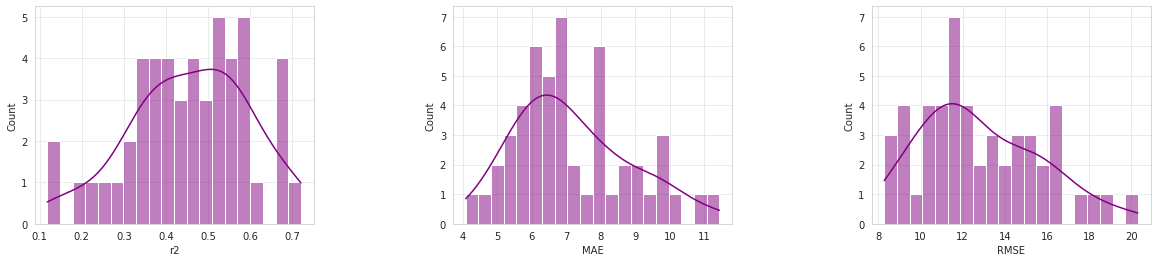

In [ ]:
metrics = pd.DataFrame(list(zip(r2,MAE,RMSE)), columns =['r2', 'MAE', 'RMSE'])

spacing = 0.5
f = plt.figure(figsize=(20,4))
gs = f.add_gridspec(1, 3)
gs.update(wspace = spacing, hspace = spacing)

# FIRST ROW

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 0])
    sns.histplot(data=metrics, x="r2", kde=True, cbar = True, color = "purple", bins = 20)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 1])
    sns.histplot(data=metrics, x="MAE", kde=True, cbar = True, color = "purple", bins = 20)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 2])
    sns.histplot(data=metrics, x="RMSE", kde=True, cbar = True, color = "purple", bins = 20)

Fitted vs Actual plot (Validation)

In [ ]:
# Visualising the Random Forest Regression results
predictions = log_rf.predict(X_test)
mae = np.round(abs(y_test - predictions))
d = {'label': y_test, 'prediction': predictions, 'mae': mae}
plot = pd.DataFrame(data = d)
# plot absolute settings
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid", {"grid.color": ".9"})

points = plt.scatter(d["label"], d["prediction"], s=50, c=d["mae"], cmap="crest")
plt.colorbar(points)
plt.xlim(0, 67)
plt.ylim(0, 67)

sns.regplot(
    x="label", y="prediction", data=plot, scatter = False, color='g')
 

ValueError: ignored

TEST on X_T set

In [ ]:
# For other metrics, we need the predictions of the model
from sklearn import metrics

Yfinal_predicted = log_rf.predict(X_T)

print('R2:',round(metrics.r2_score(Y_T, Yfinal_predicted),2))

print('MAE:', round(metrics.mean_absolute_error(Y_T, Yfinal_predicted),2))

root = math.sqrt(metrics.mean_squared_error(Y_T, Yfinal_predicted))
print('RMSE:', round(root,2))


R2: 0.53
MAE: 5.81
RMSE: 9.57


Fitted vs Actual plot (Test)

<AxesSubplot:xlabel='label', ylabel='prediction'>

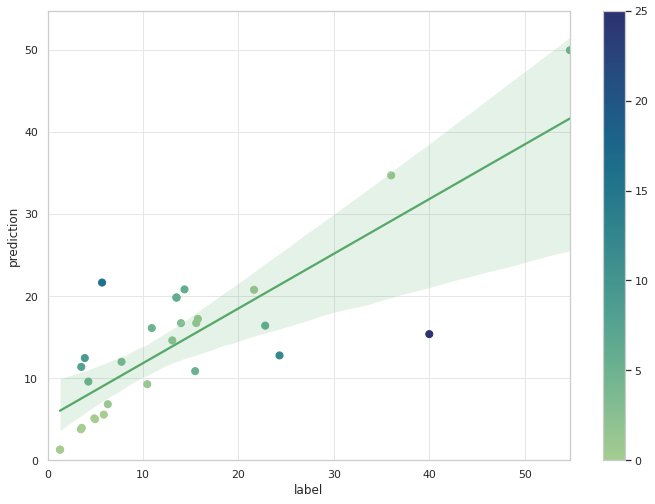

In [ ]:
# Visualising the Random Forest Regression results
predictions = Yfinal_predicted
mae = np.round(abs(Y_T - predictions))
d = {'label': Y_T, 'prediction': predictions, 'mae': mae}
plot = pd.DataFrame(data = d)
# plot absolute settings
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid", {"grid.color": ".9"})

points = plt.scatter(d["label"], d["prediction"], s=50, c=d["mae"], cmap="crest")
plt.colorbar(points)

if (max(Yfinal_predicted)> max(Y_T)):
  plot_size = max(Yfinal_predicted)
else:
  plot_size = max(Y_T)

plt.xlim(0, plot_size)
plt.ylim(0, plot_size)

sns.regplot(
    x="label", y="prediction", data=plot, scatter = False, color='g')

Absolute error in the test set plot

ValueError: ignored

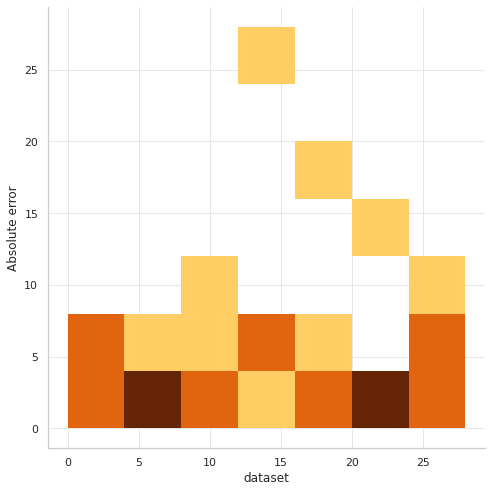

In [ ]:
# Visualising the Random Forest Regression results
n = X_T.shape[0]

sns.set_style("whitegrid", {"grid.color": ".9"})
numbers = np.array(list(range(0,int(n),+1)))

value = np.round(abs(Y_T - predictions))
d = {'Absolute error': value, 'dataset': numbers}
plot = pd.DataFrame(data = d)

sns.displot(data = plot, x="dataset", y="Absolute error", height=7,
    aspect=1, binwidth=(4, 4), cmap="YlOrBr")

sns.lineplot(data = plot, x="dataset", y=MAE, color = 'chocolate')

Feature importance

In [ ]:
from scipy.special import softmax
from sklearn.feature_selection import SelectFwe, chi2

def print_feature_importances_random_forest(random_forest_model):
    
    '''
    Prints the feature importances of a Random Forest model in an ordered way.
    random_forest_model -> The sklearn.ensemble.RandomForestRegressor or RandomForestClassifier trained model
    '''
    
    # Fetch the feature importances and feature names
    importances = rf.feature_importances_
    features = h_X
    
    # Organize them in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f}")

def print_feature_importances_shap_values(shap_values, features):
    
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''

    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
        
    # Calculates the normalized version
    importances_norm = softmax(importances)

    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}

    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}

    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

In [ ]:
# Prints the feature importances
print_feature_importances_random_forest(rf)

AREA_F -> 0.2171
VOL -> 0.1756
YOC -> 0.1063
APT_NUM -> 0.0727
ZIPCODE_8052 -> 0.0429
ZIPCODE_8057 -> 0.0307
ST_NUM -> 0.0284
KREIS_6 -> 0.0245
ZIPCODE_8044 -> 0.0245
ZIPCODE_8049 -> 0.0235
KREIS_9 -> 0.0197
ZIPCODE_8006 -> 0.0184
ROOF_O -> 0.0182
ZIPCODE_8053 -> 0.0169
KREIS_11 -> 0.0165
ZIPCODE_8048 -> 0.0162
POC_8013 -> 0.0134
KREIS_10 -> 0.0125
ZIPCODE_8051 -> 0.0125
ZIPCODE_8032 -> 0.0119
ROOF_M -> 0.0108
KREIS_7 -> 0.0107
KREIS_12 -> 0.0100
ZIPCODE_8055 -> 0.0095
POC_8012 -> 0.0083
POC_8011c -> 0.0082
ROOF_P -> 0.0068
ZIPCODE_8002 -> 0.0060
KREIS_2 -> 0.0044
ZIPCODE_8050 -> 0.0034
POC_8014 -> 0.0034
ZIPCODE_8004 -> 0.0023
KREIS_4 -> 0.0022
POC_8011d -> 0.0022
ZIPCODE_8047 -> 0.0020
ROOF_F -> 0.0018
KREIS_3 -> 0.0016
ZIPCODE_8046 -> 0.0014
ZIPCODE_8038 -> 0.0008
ZIPCODE_8003 -> 0.0005
ZIPCODE_8005 -> 0.0004
KREIS_5 -> 0.0004
ZIPCODE_8045 -> 0.0002
POC_8015 -> 0.0002
ZIPCODE_8037 -> 0.0002
ZIPCODE_8008 -> 0.0001
KREIS_8 -> 0.0001
POC_8011b -> 0.0000


In [ ]:
import shap
# Fits the explainer
explainer = shap.Explainer(rf.predict, X_list)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

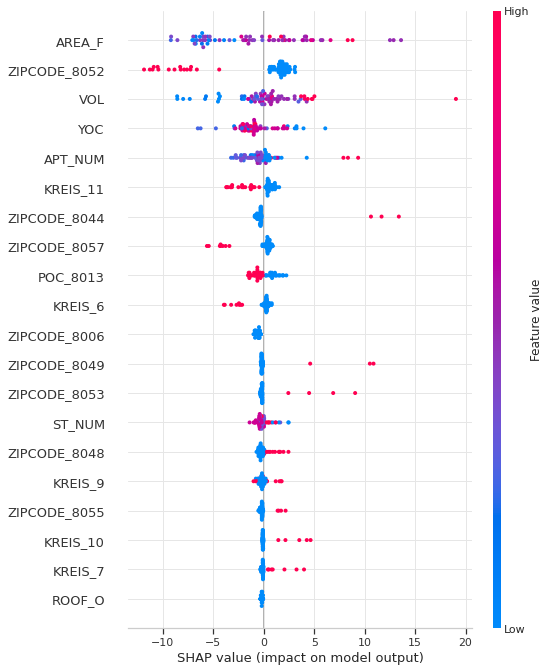

In [ ]:
shap.summary_plot(shap_values, feature_names = h_X)